# Project 1 Boston Housing<br>
***
This file contains the exploration, preprocessig and predictions on the boston_housing dataset. The dataset holds 506 instances and 13 features. Our target is to use these features to find the median value of homes.
***
Features:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
***

Targets:
1. MEDV: Median value of owner-occupied homes in $1000's
***
Missing Attribute Values: None
***

### Imports

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error
sns.set()

### Load in the data

In [2]:
boston_housing = datasets.load_boston()
boston_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_housing.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
boston_housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_housing.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
column_names = list(boston_housing.feature_names)
column_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### Turning the data into a dataframe and defining X and y

In [7]:
X = pd.DataFrame(data=boston_housing.data, columns=column_names)
y = pd.DataFrame(data=boston_housing.target, columns=["MEDV"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Just to check that there is no missing data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


We can confirm that there are 506 non-null values for all features. **No missing data**, CHAS is a bool type therfore we will make the CHAS attribute as type bool so to no apply standard scaling to it.

In [9]:
X["CHAS"] = X["CHAS"].astype('bool')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    bool   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: bool(1), float64(12)
memory usage: 48.1 KB


In [10]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
features_skew = X.select_dtypes(include=[np.number]).skew()
features_skew

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

### CRIM, ZN, CHAS, DIS, RAD, B, and LSTAT are all skewded features. We can show this visually.

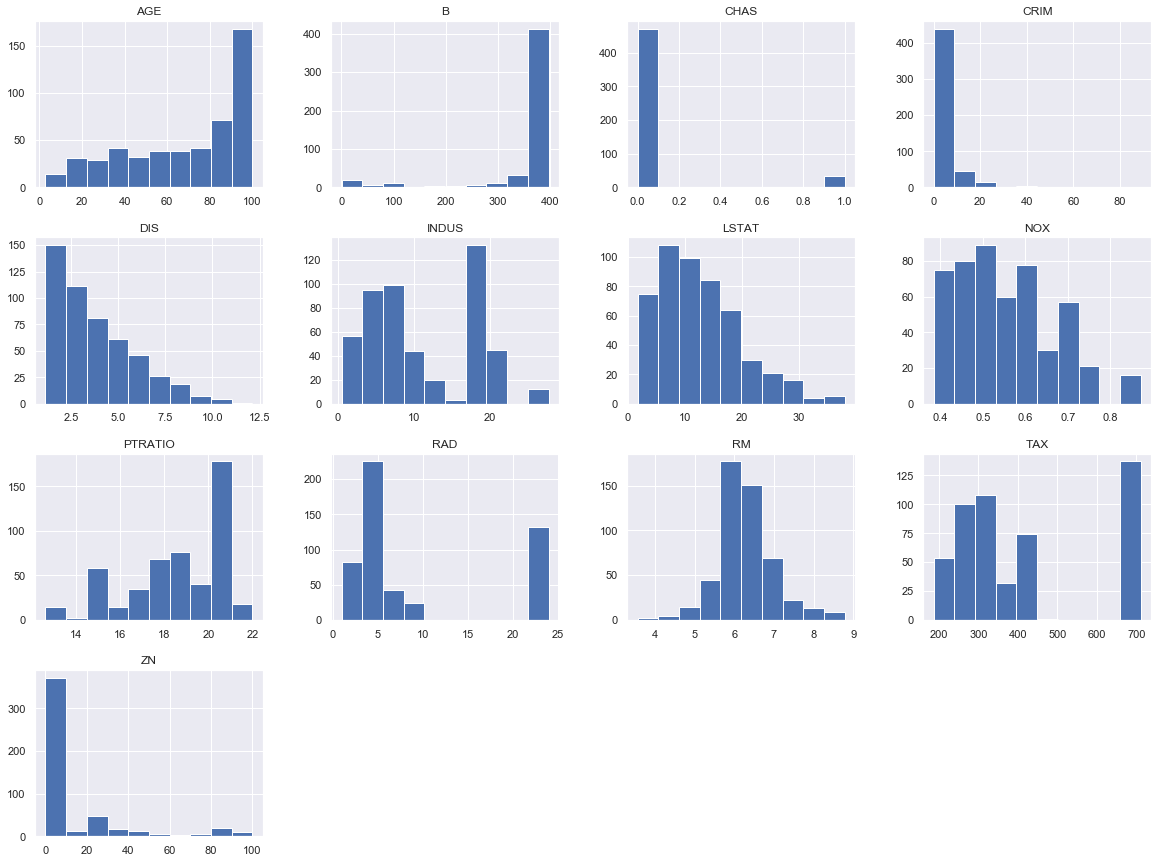

In [12]:
import matplotlib.pyplot as plt
X.astype('float64').hist(bins=10, figsize=(20,15))
plt.show()

In [13]:
log_fea = list(features_skew[abs(features_skew) > 0.9].index)
scale_fea = list([name for name in features_skew.index if name not in log_fea])
boolean_fea = list(X.select_dtypes(exclude=[np.number]).columns)

In [14]:
log_fea

['CRIM', 'ZN', 'DIS', 'RAD', 'B', 'LSTAT']

In [15]:
scale_fea

['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']

In [16]:
boolean_fea

['CHAS']

In [17]:
scale_features = ['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO']
log_features = ['CRIM', 'ZN', 'DIS', 'RAD', 'B', 'LSTAT']

**For some resaon it doesnt recognise the lists as lists and has to be done manually**

### We now split the data

### We need to make a log function so that we can reduce the skew of this data but there is no log transformer so we use FunctionTransformer and call transform

In [28]:
preprocessor = ColumnTransformer(transformers=[
        ('scale', StandardScaler(), scale_features),
        #('log', FunctionTransformer(np.log1p, validate=False), log_features)
        ], remainder='passthrough')
# Using log1p so we dont have to worry about having to log 0 

In [29]:
X_scaled = preprocessor.fit_transform(X)
X_scaled

array([[-1.287909498957745, -0.14421743255530314, 0.4136718893017581,
        ..., 1.0, 396.9, 4.98],
       [-0.5933810131002402, -0.7402622069004932, 0.19427445318162764,
        ..., 2.0, 396.9, 9.14],
       [-0.5933810131002402, -0.7402622069004932, 1.282713681725651, ...,
        2.0, 392.83, 4.03],
       ...,
       [0.11573840733410301, 0.1581241196487778, 0.9849600184197601, ...,
        1.0, 396.9, 5.64],
       [0.11573840733410301, 0.1581241196487778, 0.7256721393686961, ...,
        1.0, 393.45, 6.48],
       [0.11573840733410301, 0.1581241196487778, -0.36276708917532724,
        ..., 1.0, 396.9, 7.88]], dtype=object)

### The column transformer is changing the possitions of our columns and when making a dataframe, this must be adjusted for. It follws the columns sclaed then log then leaves the bool at the end.

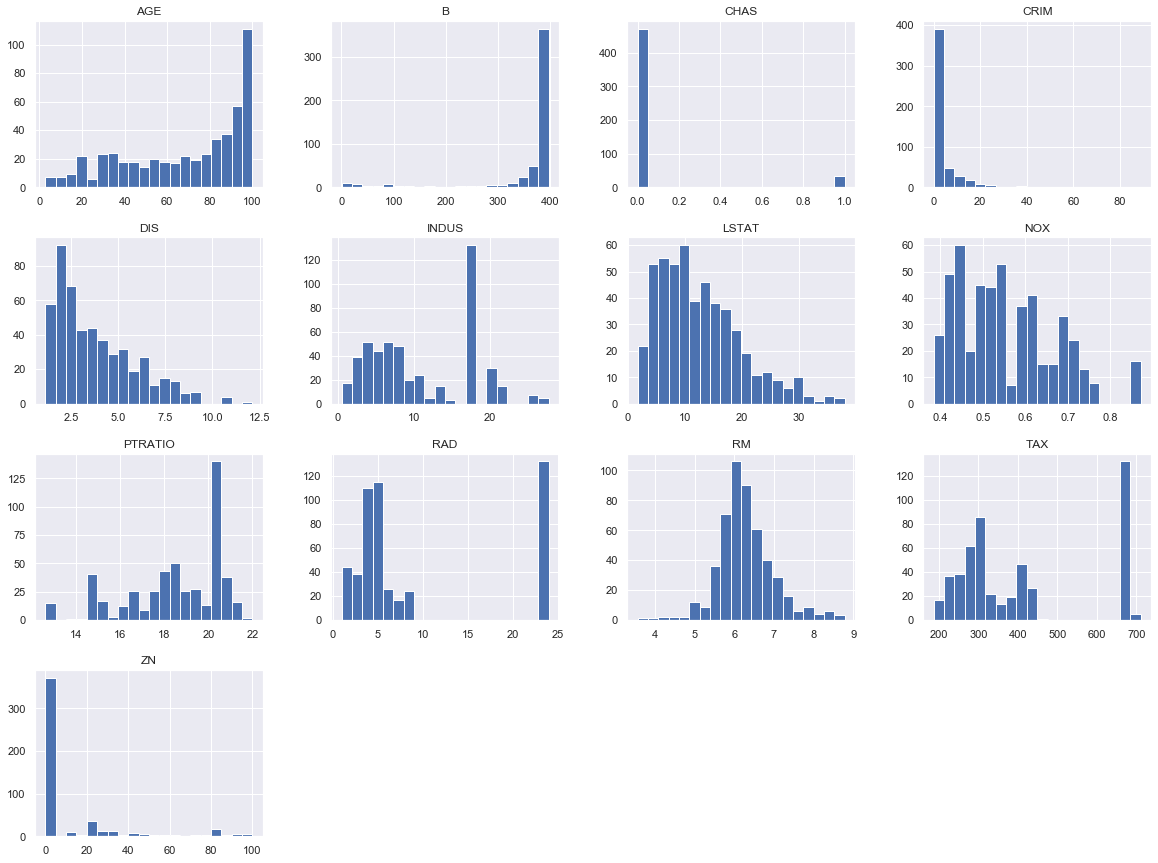

In [30]:
import matplotlib.pyplot as plt
X.astype('float64').hist(bins=20, figsize=(20,15))
plt.show()

In [31]:
column_names_new = ['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'CRIM', 'ZN', 'DIS', 'RAD', 'B', 'LSTAT', 'CHAS']
new = pd.DataFrame(data=X_scaled, columns=column_names_new)
new.hist(bins=20, figsize=(20,15))
plt.show()

ValueError: hist method requires numerical columns, nothing to plot.

# Experimentation 

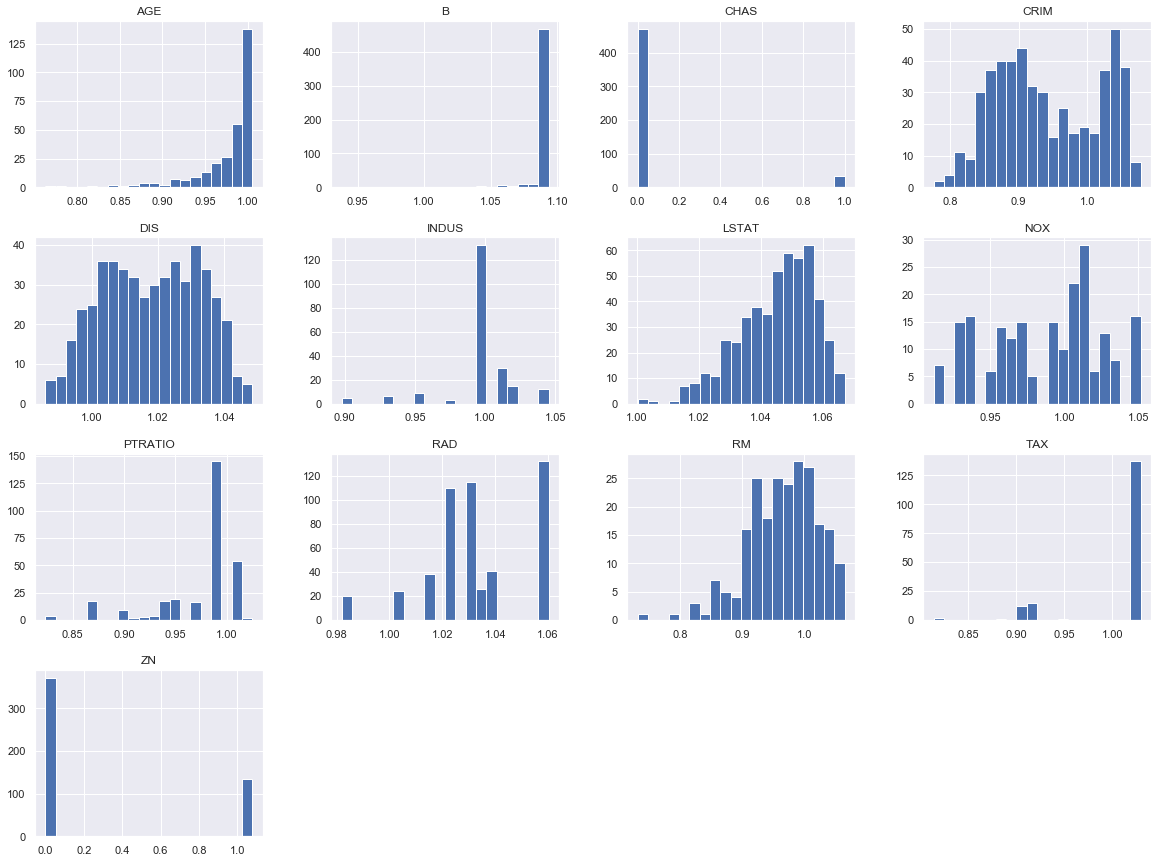

In [22]:
NewX = new.drop("CHAS", axis=1)
# NewX = np.log(NewX + 100)
new[['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'CRIM', 'ZN', 'DIS', 'RAD', 'B', 'LSTAT']] = NewX**0.05
new.hist(bins=20, figsize=(20,15))
plt.show()
# mess around with this and ttry to get these features as normal as possible using log(X + c) and **0.something 

In review; AGE, B, CRIM, and ZN are not the best and may require changing

In [27]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    212 non-null    float64
 1   NOX      209 non-null    float64
 2   RM       228 non-null    float64
 3   AGE      293 non-null    float64
 4   TAX      168 non-null    float64
 5   PTRATIO  292 non-null    float64
 6   CRIM     506 non-null    float64
 7   ZN       506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  CHAS     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [23]:
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size=0.2, shuffle=True, random_state=42) 

### log scailing is accepted as a scailing, we will try it on the log_features and not apply standard scalining at this point 

In [24]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


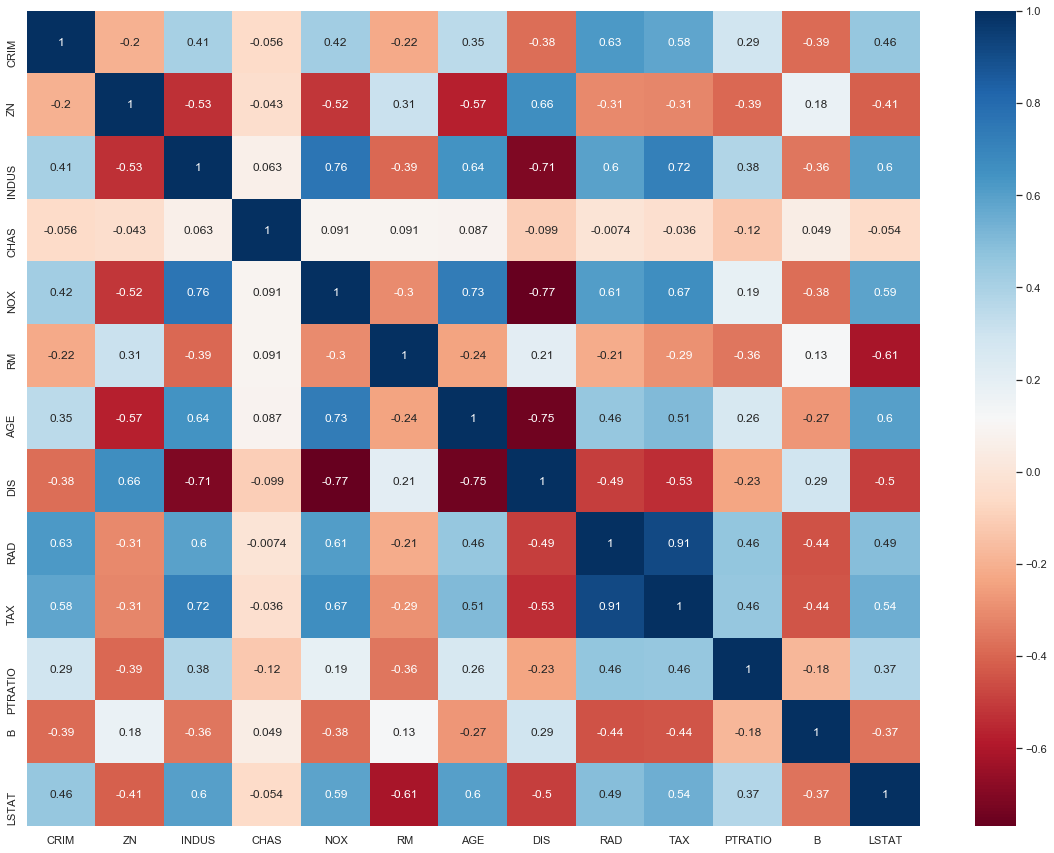

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(X.corr(), cmap='RdBu', annot=True)

In [26]:
random_reg = RandomForestRegressor(random_state=42)
lin_reg = LinearRegression()
elastic_reg = ElasticNet(random_state=42)
lass_reg = Lasso(random_state=42)
svr = SVR()
lin_srv = LinearSVR(random_state=42)

random_reg.fit(X_train, y_train)
lin_reg.fit(X_train, y_train)
elastic_reg.fit(X_train, y_train)
lass_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
lin_srv.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_reg, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

In [ ]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

In [ ]:
scores = cross_val_score(elastic_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

In [ ]:
scores = cross_val_score(lass_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

In [ ]:
scores = cross_val_score(svr, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

In [ ]:
scores = cross_val_score(lin_srv, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10);
random_tree_scores=np.sqrt(-scores)
random_tree_scores.mean()

As expected Random_reg was best but must be overfitting. Now we apply GridSearchCV

In [ ]:
param_grid = [
        {'n_estimators':[3, 30],'max_features':[2, 8]},
        {'bootstrap':[False],'n_estimators':[17, 18, 19],'max_features':[4.5, 5, 5.5]}
            ]
grid_search = GridSearchCV(random_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
np.sqrt(abs(grid_search.best_score_))

In [ ]:
grid_search.best_estimator_

In [ ]:
feature_importance=grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importance, column_names_new), reverse=True)

### This suggests that i could drop AGE and NOX

In [ ]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train.values.ravel())

In [ ]:
X_test_prepared=preprocessor.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

In [ ]:
final_model.score(X_train, y_train)

In [ ]:
final_model.score(X_test, y_test)

### It has still overfitted like crazy

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_error, val_error = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))
        val_error.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(20, 15))
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-", linewidth=3, label="val")
    plt.legend(["Training data", "Validation data"])

In [ ]:
plot_learning_curves(final_model, X_train, y_train.values.ravel())

## Plot clearly shows the gap between validation scores and training scores